## __Недообучение и переобучение__

### __Задания для выполнения__

1. Загрузите первые 400 строк прилагающегося датасета `diabetes.csv`.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную `Outcome`.
4. Разделите данные на обучающую и валидационную выборки при помощи `train_test_split` из библиотеки `sklearn.model_selection` в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра `random_state=42`.
5. Создайте объект `DecisionTreeClassifier(random_state=1)`. Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики `f1-score`для трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции `cross_validate` из библиотеки  `sklearn.model_selection`. По полученным данным, постройте график зависимости значений `f1-score` от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель `DecisionTreeClassifier`, уменьшив глубину дерева, указав параметр регуляризации `max_depth=3`.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные.
Для этого загрузите все строки датасета `diabetes.csv`.
10. Обучите модель `DecisionTreeClassifier(random_state=1, max_depth=3)` на всех данных и убедитесь в том, что значение метрики `f1-score` улучшилось.

### __Диагностика моделей классификации__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


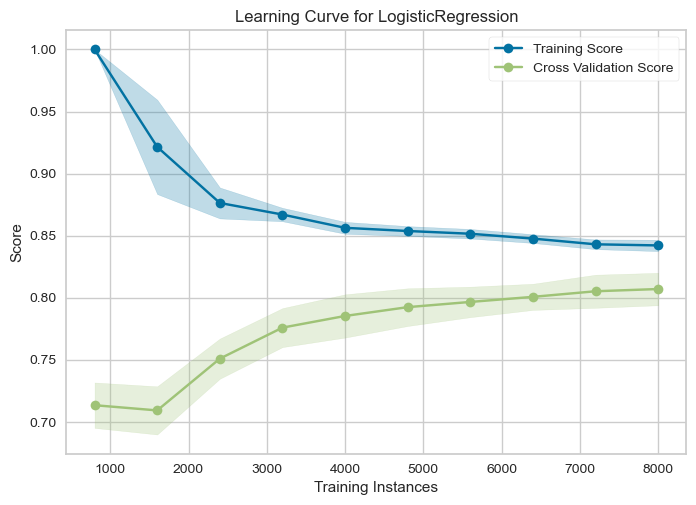

In [4]:
import warnings
warnings.filterwarnings("ignore")

from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [5]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


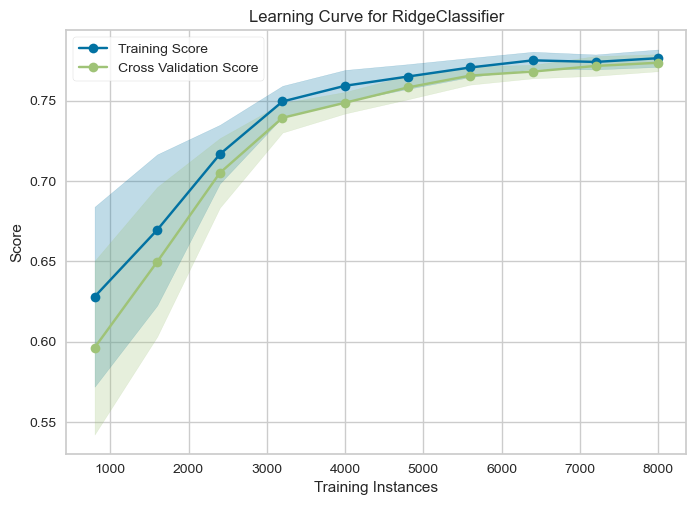

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

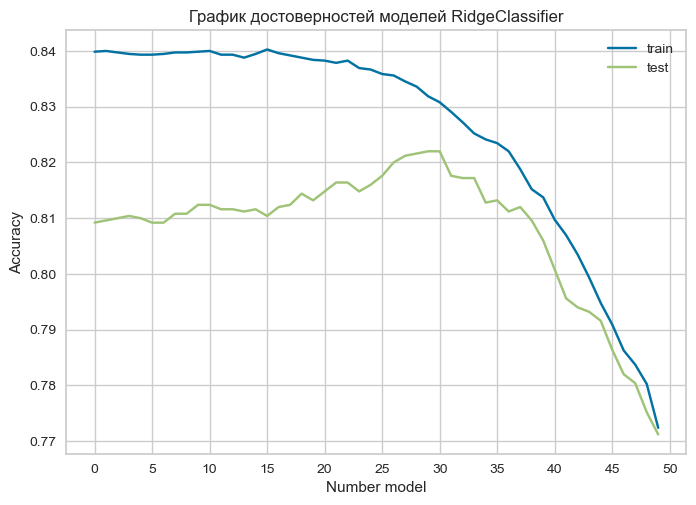

In [7]:
trains = []
tests = []
L2 = []
for l2 in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=l2).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  L2.append(l2)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График достоверностей моделей RidgeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 51, 5))
plt.legend()
plt.show()

In [8]:
L2[30]

28117.68697974225

In [9]:
lr = RidgeClassifier(alpha=L2[30]).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8308
Test score: 0.8220


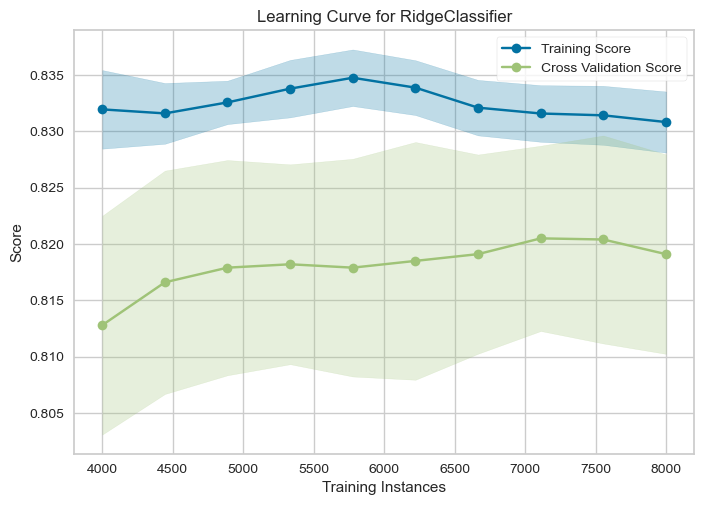

In [10]:
visualizer = LearningCurve(
    lr, train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

__Диагностика моделей регрессии__

In [11]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', header=None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.00000
1,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.00000
2,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.00000
3,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.00000
4,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.00000
...,...,...,...,...,...,...,...,...
100,506.0,0.204698,0.168367,0.0,0.071486,0.155388,0.311613,0.82502
101,506.0,0.860314,0.265606,0.0,0.894405,0.972654,0.996599,1.00000
102,506.0,0.254263,0.178510,0.0,0.117439,0.219227,0.344749,1.00000
103,506.0,0.129599,0.161755,0.0,0.020748,0.070612,0.176497,1.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 105 entries, 0 to 104
dtypes: float64(105)
memory usage: 415.2 KB


In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Linear Regression-Training set score:', reg.score(X_train, y_train))
print('Linear Regression-Test set score:', reg.score(X_test, y_test))

Linear Regression-Training set score: 0.9520519609032729
Linear Regression-Test set score: 0.6074721959665752


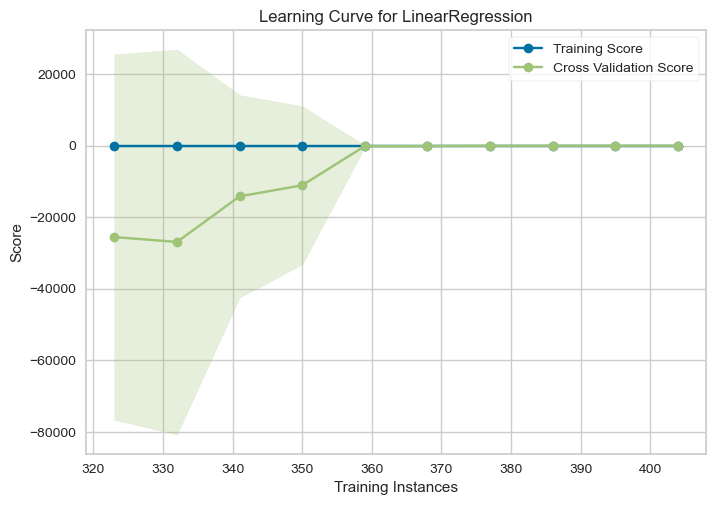

In [16]:
visualizer = LearningCurve(
    reg, scoring='r2', train_sizes=np.linspace(0.8, 1.0, 10)
).fit(X, y).show()

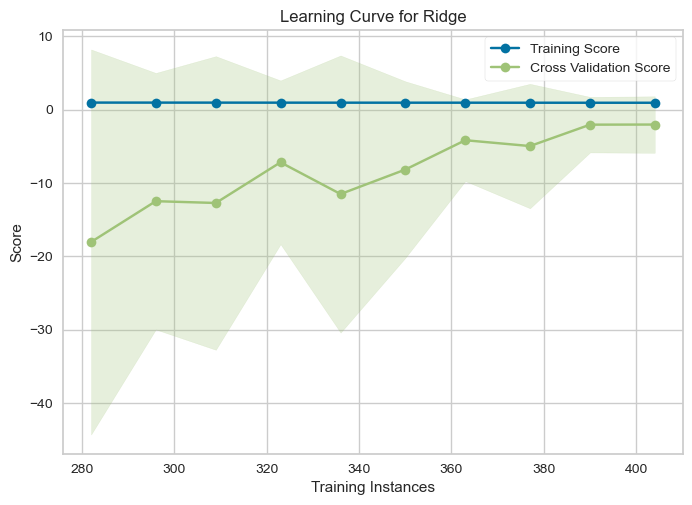

In [17]:
from sklearn.linear_model import Ridge

visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y).show()

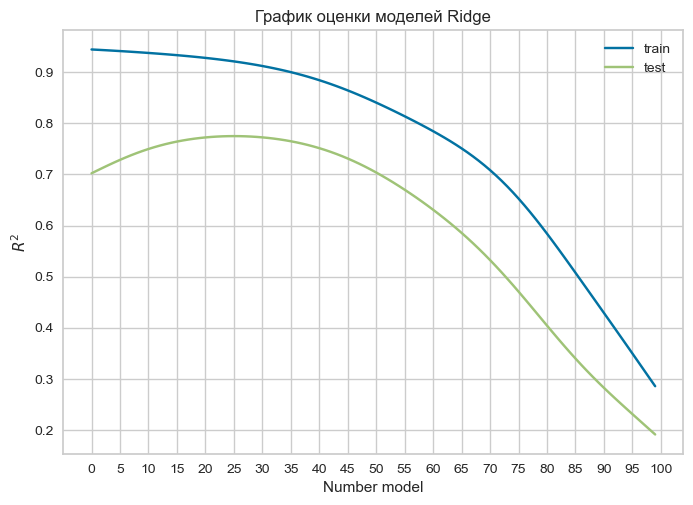

In [18]:
trains = []
tests = []
l2 = []

for alpha in np.logspace(-2, 3, 100):
  ridge = Ridge(alpha=alpha).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  l2.append(alpha)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График оценки моделей Ridge')
plt.ylabel('${R^2}$')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 101, 5))

plt.legend()
plt.show()

In [19]:
l2[25]

0.18307382802953678

In [20]:
lr = Ridge(alpha=l2[25]).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


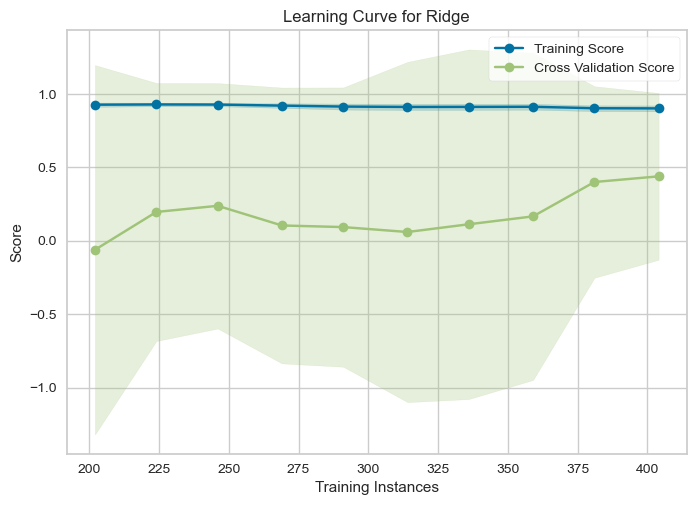

In [21]:
visualizer = LearningCurve(
    lr, scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

__Диагностика на реальных данных__

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               200 non-null    int64  
 1   Glucose                   200 non-null    int64  
 2   BloodPressure             200 non-null    int64  
 3   SkinThickness             200 non-null    int64  
 4   Insulin                   200 non-null    int64  
 5   BMI                       200 non-null    float64
 6   DiabetesPedigreeFunction  200 non-null    float64
 7   Age                       200 non-null    int64  
 8   Outcome                   200 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 14.2 KB


In [24]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


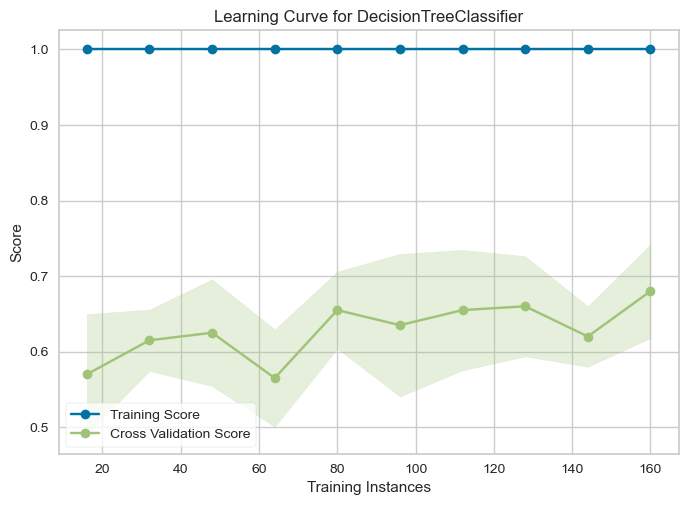

In [26]:
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [27]:
model = DecisionTreeClassifier(max_depth=4, random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.8500
Test score = 0.6250


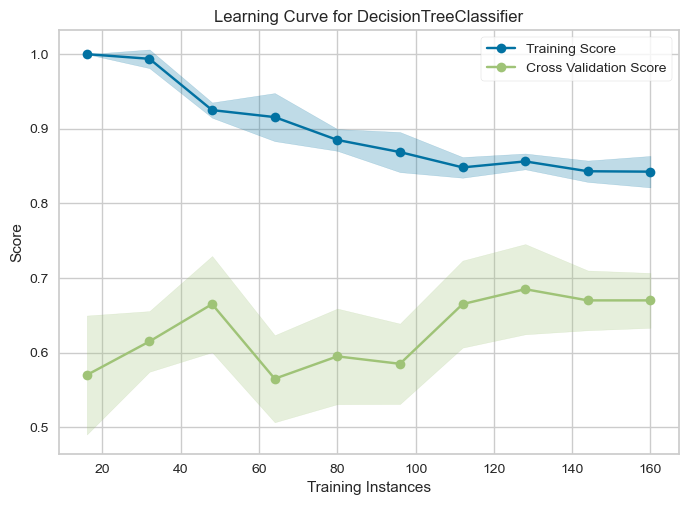

In [28]:
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')

y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


__Диагностика недообучения__

In [31]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='delta_ailerons')
data.data.shape

(7129, 5)

In [32]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


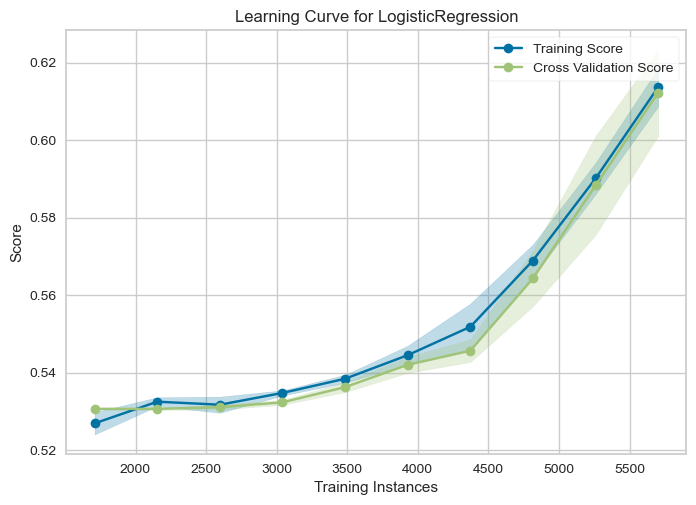

In [34]:
visualizer = LearningCurve(
    model, scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [35]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9386
Test score = 0.9404


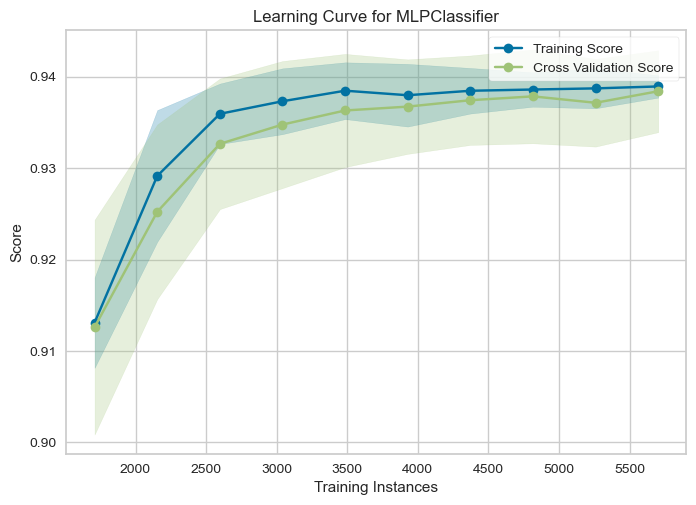

In [36]:
visualizer = LearningCurve(
    model, scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show()

In [37]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures

In [38]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


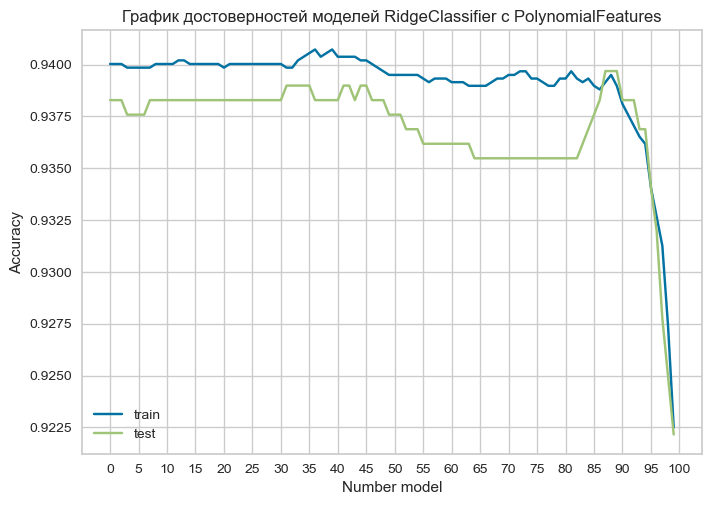

In [39]:
trains = []
tests = []
l2 = []

for alpha in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=alpha).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)

  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))
  l2.append(alpha)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График достоверностей моделей RidgeClassifier c PolynomialFeatures')
plt.ylabel('Accuracy')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 101, 5))

plt.legend()
plt.show()

In [40]:
l2[86]

0.12045035402587811

In [41]:
model = RidgeClassifier(alpha=l2[86]).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9388
Test score = 0.9383


# Задания для самостоятельного выполнения

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

In [42]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict(X_train)

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("---------------")

y_pred = lr.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test score: {lr.score(X_test, y_test):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Training score: 0.8415
Precision: 0.8339
Recall: 0.8515
F1-score: 0.8426
---------------
Test score: 0.8056
Precision: 0.8069
Recall: 0.8056
F1-score: 0.8062


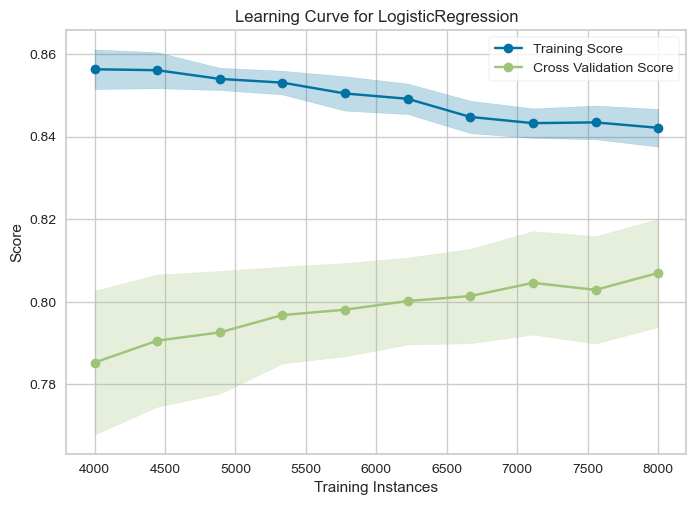

Training score: 0.7724
Precision: 0.7683
Recall: 0.7780
F1-score: 0.7731
---------------
Test score: 0.7712
Precision: 0.7678
Recall: 0.7801
F1-score: 0.7739


In [44]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

y_pred = lr.predict(X_train)

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("---------------")

y_pred = lr.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test score: {lr.score(X_test, y_test):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

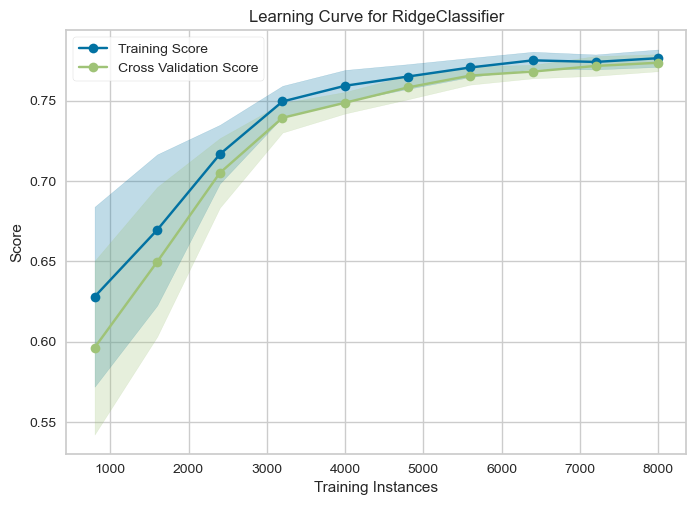

In [45]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

# Score

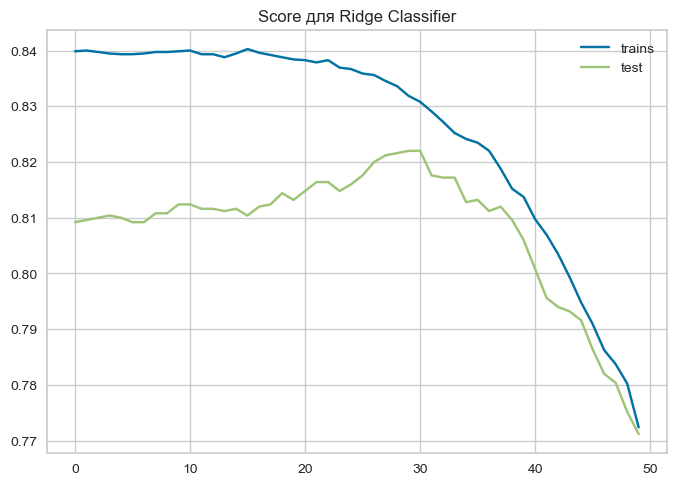

Training score: 0.8311
Test score: 0.8228


In [46]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="trains")
plt.plot(tests, label="test")
plt.title("Score для Ridge Classifier")
plt.legend()
plt.show()

from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

# Precision

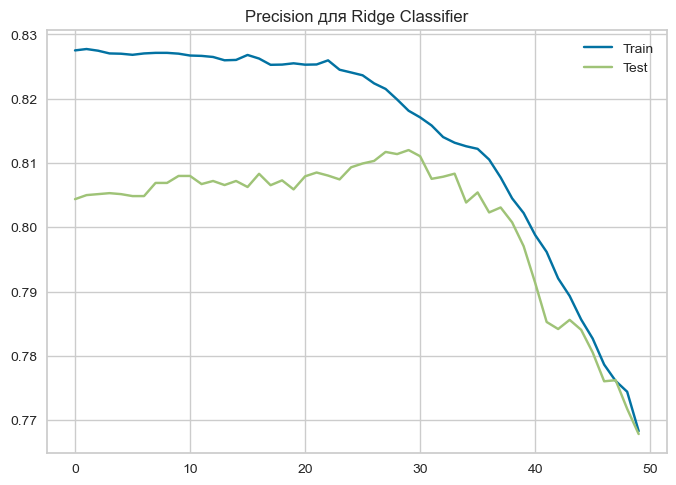

Training score: 0.7683
Test score: 0.7678


In [47]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score

trains = []
tests = []

for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    
    trains.append(precision_score(y_train, y_pred_train))
    tests.append(precision_score(y_test, y_pred_test))

plt.plot(trains, label="Train")
plt.plot(tests, label="Test")
plt.title("Precision для Ridge Classifier")
plt.legend()
plt.show()

from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print(f"Training score: {precision_score(y_train, y_pred_train):.4f}")
print(f"Test score: {precision_score(y_test, y_pred_test):.4f}")

# Recall

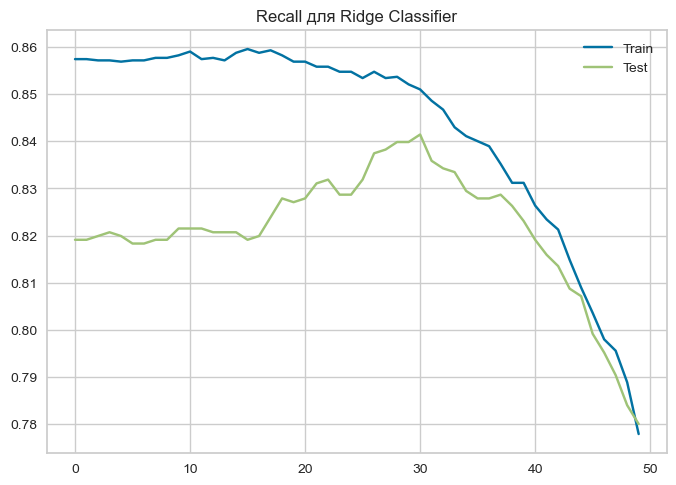

Training score: 0.7780
Test score: 0.7801


In [48]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score

trains = []
tests = []

for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    
    trains.append(recall_score(y_train, y_pred_train))
    tests.append(recall_score(y_test, y_pred_test))

plt.plot(trains, label="Train")
plt.plot(tests, label="Test")
plt.title("Recall для Ridge Classifier")
plt.legend()
plt.show()

from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print(f"Training score: {recall_score(y_train, y_pred_train):.4f}")
print(f"Test score: {recall_score(y_test, y_pred_test):.4f}")

# F1

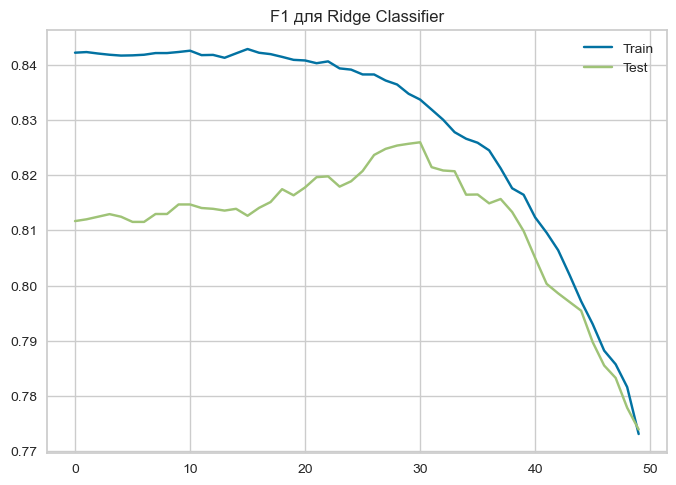

Training score: 0.7731
Test score: 0.7739


In [49]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import precision_score

trains = []
tests = []

for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    
    trains.append(f1_score(y_train, y_pred_train))
    tests.append(f1_score(y_test, y_pred_test))

plt.plot(trains, label="Train")
plt.plot(tests, label="Test")
plt.title("F1 для Ridge Classifier")
plt.legend()
plt.show()

from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print(f"Training score: {f1_score(y_train, y_pred_train):.4f}")
print(f"Test score: {f1_score(y_test, y_pred_test):.4f}")

# 2. Повторите диагностику модели регрессии с использованием других видов моделей:
### • метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
### • метода ближайших соседей (исследуйте влияние количества соседей)
### • метода решающих деревьев (гиперпараметры по вашему выбору)

In [50]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
df = pd.read_csv('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', header=None)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,0.040544,0.096679,0.0,0.000851,0.002812,0.041258,1.00000
1,506.0,0.113636,0.233225,0.0,0.000000,0.000000,0.125000,1.00000
2,506.0,0.391378,0.251479,0.0,0.173387,0.338343,0.646628,1.00000
3,506.0,0.069170,0.253994,0.0,0.000000,0.000000,0.000000,1.00000
4,506.0,0.349167,0.238431,0.0,0.131687,0.314815,0.491770,1.00000
...,...,...,...,...,...,...,...,...
100,506.0,0.204698,0.168367,0.0,0.071486,0.155388,0.311613,0.82502
101,506.0,0.860314,0.265606,0.0,0.894405,0.972654,0.996599,1.00000
102,506.0,0.254263,0.178510,0.0,0.117439,0.219227,0.344749,1.00000
103,506.0,0.129599,0.161755,0.0,0.020748,0.070612,0.176497,1.00000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 105 entries, 0 to 104
dtypes: float64(105)
memory usage: 415.2 KB


# SVM

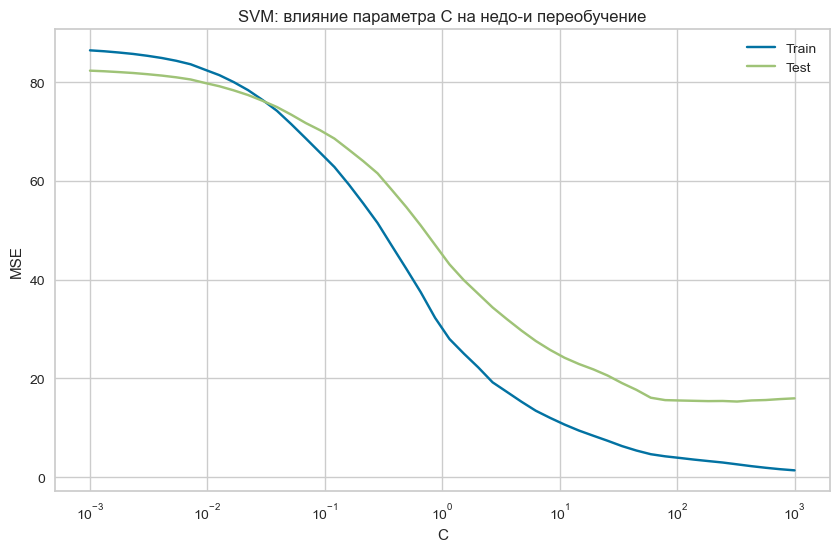

In [52]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

train_errors_svm = []
test_errors_svm = []

for C in np.logspace(-3, 3, 50):
    svm = SVR(C=C)
    svm.fit(X_train, y_train)
    
    train_pred = svm.predict(X_train)
    test_pred = svm.predict(X_test)
    
    train_errors_svm.append(mean_squared_error(y_train, train_pred))
    test_errors_svm.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(np.logspace(-3, 3, 50), train_errors_svm, label='Train')
plt.plot(np.logspace(-3, 3, 50), test_errors_svm, label='Test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.title('SVM: влияние параметра С на недо-и переобучение')
plt.legend()
plt.show()


# KNeighborsRegressor

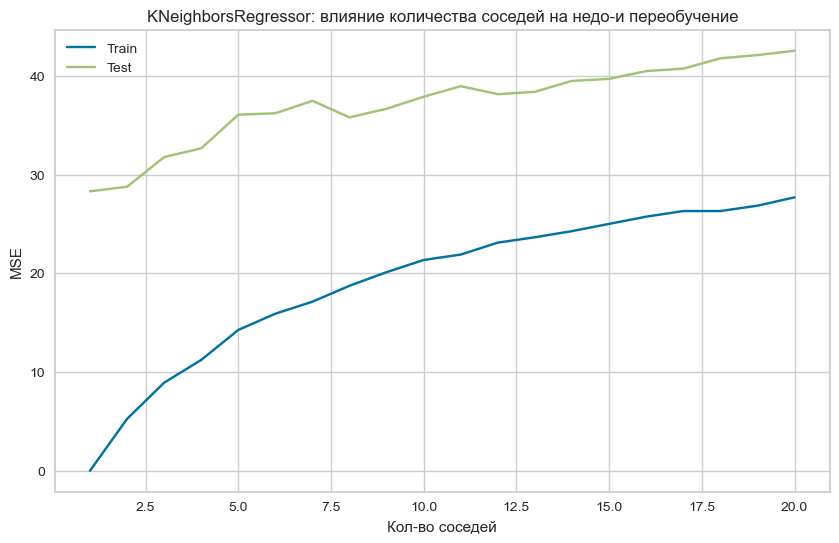

In [53]:
from sklearn.neighbors import KNeighborsRegressor

train_errors_knn = []
test_errors_knn = []

for n_neighbors in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_errors_knn.append(mean_squared_error(y_train, train_pred))
    test_errors_knn.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_errors_knn, label='Train')
plt.plot(range(1, 21), test_errors_knn, label='Test')
plt.xlabel('Кол-во соседей')
plt.ylabel('MSE')
plt.title('KNeighborsRegressor: влияние количества соседей на недо-и переобучение')
plt.legend()
plt.show()


# DecisionTreeRegressor

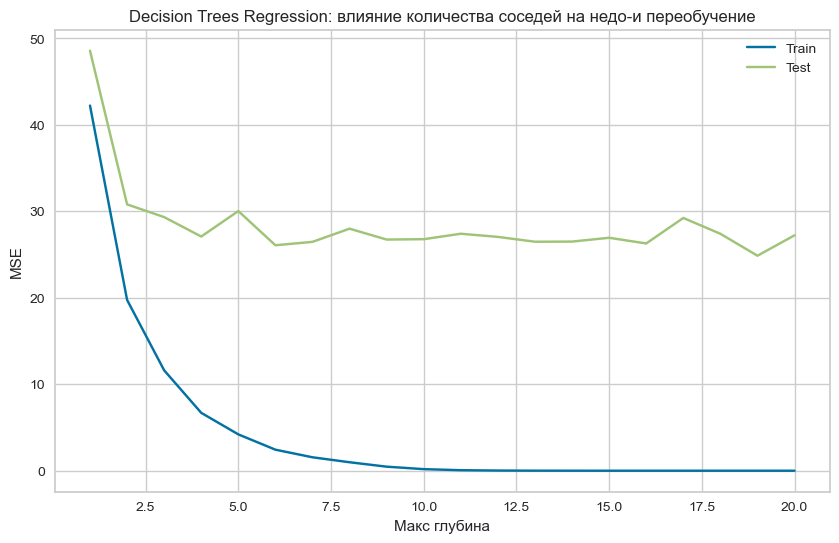

In [54]:
from sklearn.tree import DecisionTreeRegressor

train_errors_dt = []
test_errors_dt = []

for max_depth in range(1, 21):
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)
    
    train_errors_dt.append(mean_squared_error(y_train, train_pred))
    test_errors_dt.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_errors_dt, label='Train')
plt.plot(range(1, 21), test_errors_dt, label='Test')
plt.xlabel('Макс глубина')
plt.ylabel('MSE')
plt.title('Decision Trees Regression: влияние количества соседей на недо-и переобучение')
plt.legend()
plt.show()


# 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [55]:
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

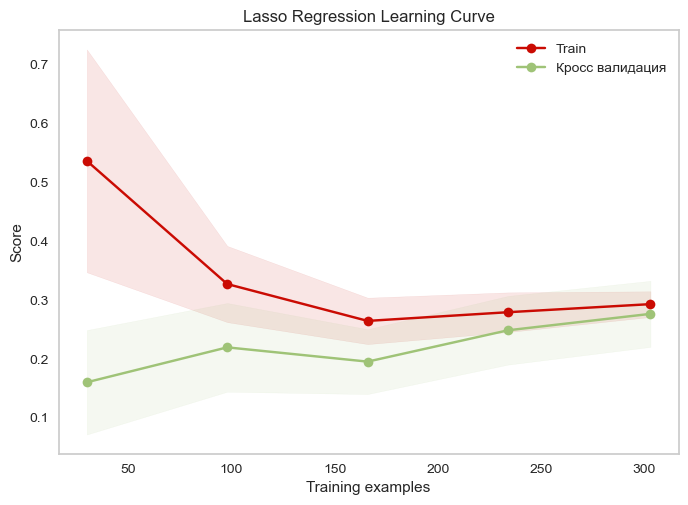

<Figure size 800x550 with 0 Axes>

Optimal alpha: 2.154434690031882


In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve, validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Кросс валидация")

    plt.legend(loc="best")
    return plt

lasso_model = Lasso()

plot_learning_curve(lasso_model, "Lasso Regression Learning Curve", X_train, y_train, cv=5)

param_range = np.logspace(-3, 3, 10)
train_scores, test_scores = validation_curve(
    Lasso(), X_train, y_train, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=1)

test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure()
plt.show()

optimal_alpha = param_range[np.argmax(test_scores_mean)]
print("Optimal alpha:", optimal_alpha)


# 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

In [72]:
X, y = make_regression(n_samples=100, n_features=1, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ElasticNet (alpha=0.1, l1_ratio=0.1): Training score = 0.9900732643935605, Test score = 0.9897030418144415
ElasticNet (alpha=0.1, l1_ratio=0.5): Training score = 0.9964738405591138, Test score = 0.996290222845304
ElasticNet (alpha=0.1, l1_ratio=0.9): Training score = 0.9997386055790675, Test score = 0.99968920290308
ElasticNet (alpha=1, l1_ratio=0.1): Training score = 0.724006217172522, Test score = 0.7179437966187814
ElasticNet (alpha=1, l1_ratio=0.5): Training score = 0.8490325851928207, Test score = 0.8455406954517256
ElasticNet (alpha=1, l1_ratio=0.9): Training score = 0.9824232344516526, Test score = 0.981855167564441
ElasticNet (alpha=10, l1_ratio=0.1): Training score = 0.1551772242435776, Test score = 0.13779632063160685
ElasticNet (alpha=10, l1_ratio=0.5): Training score = 0.22561660127022032, Test score = 0.209621459697514
ElasticNet (alpha=10, l1_ratio=0.9): Training score = 0.5530593019389074, Test score = 0.543554488183534


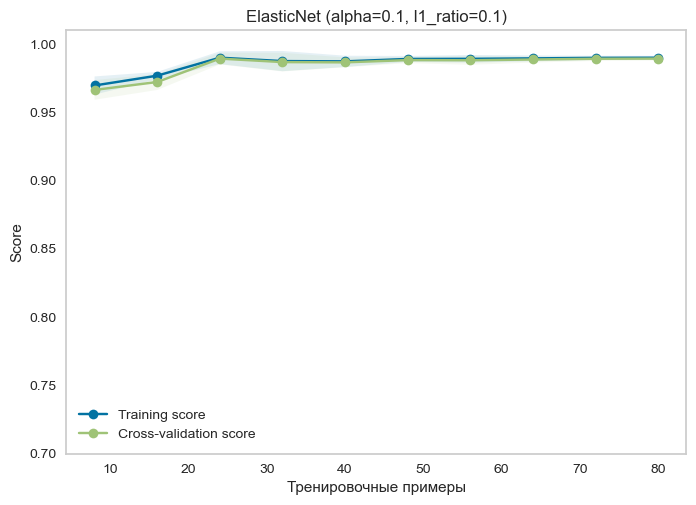

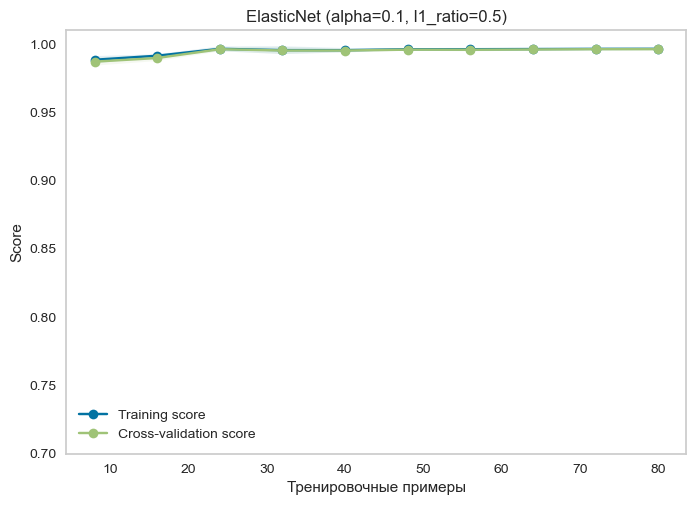

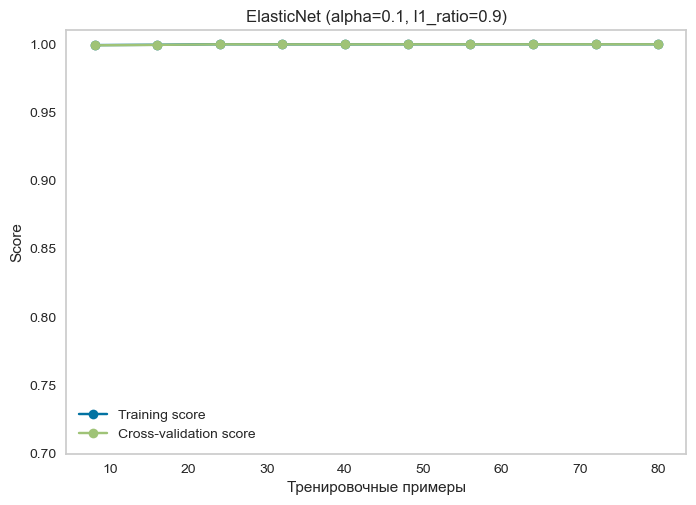

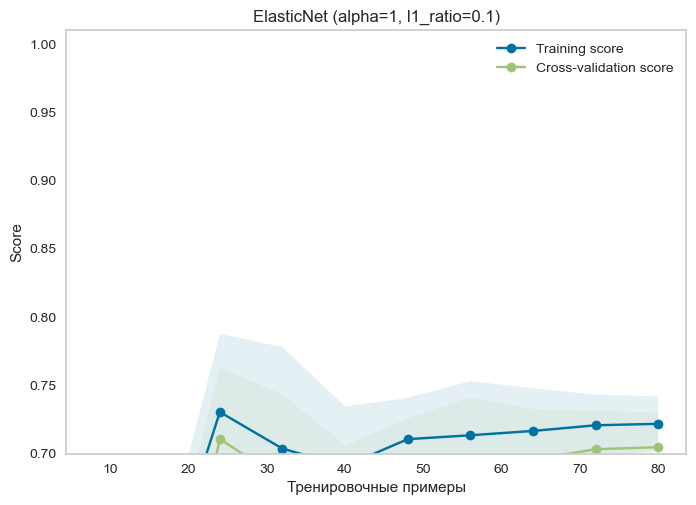

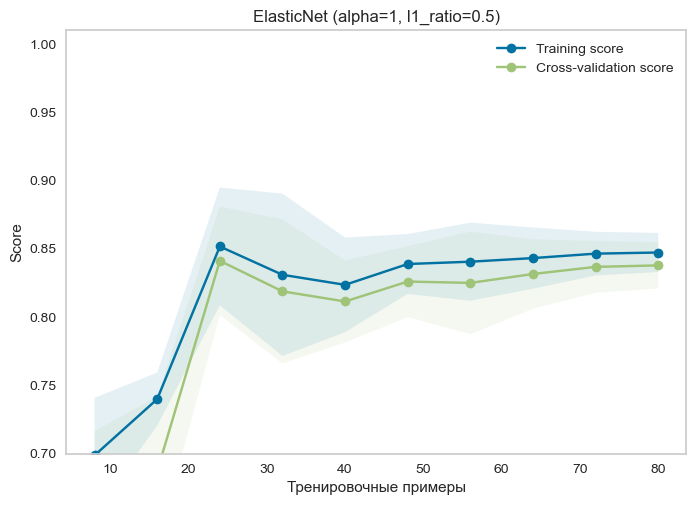

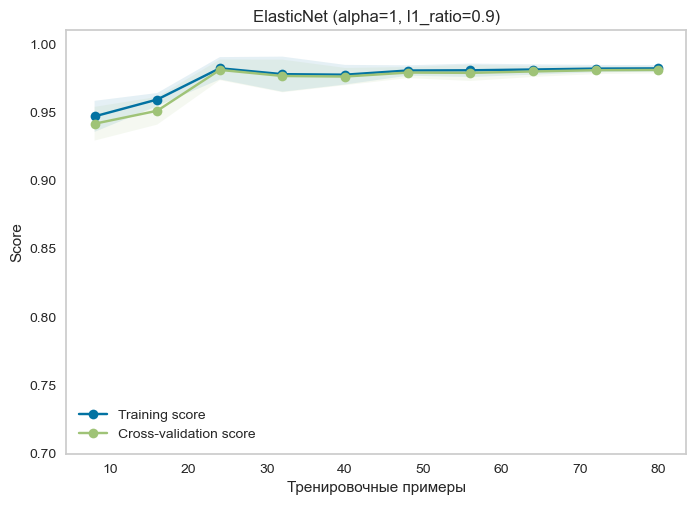

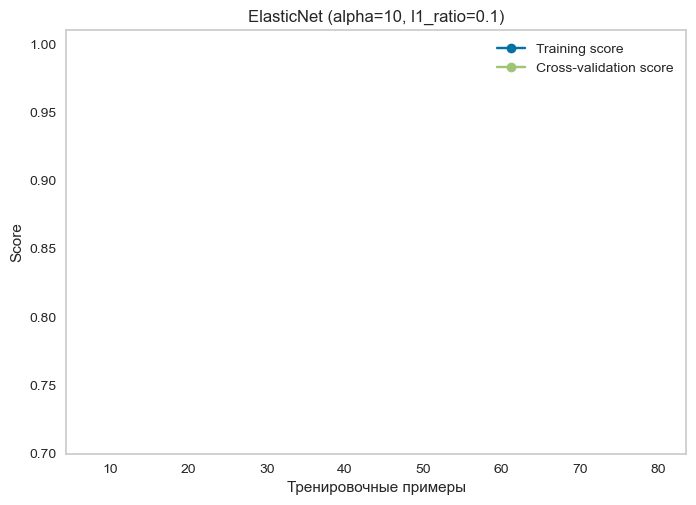

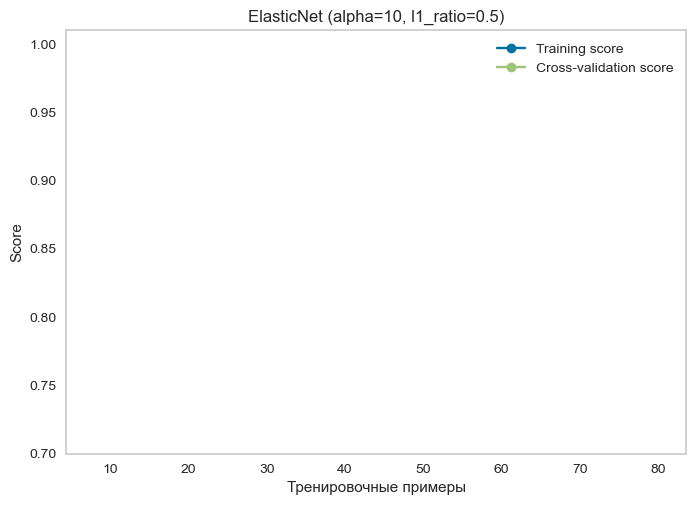

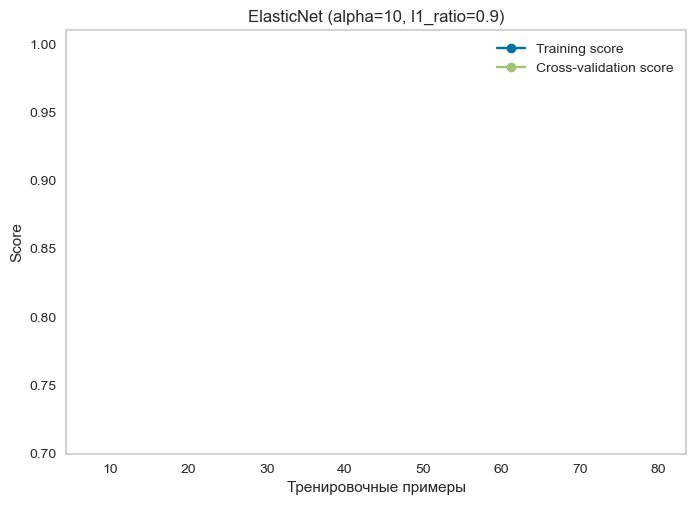

In [75]:
from sklearn.linear_model import ElasticNet

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Тренировочные примеры")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

    plt.legend(loc="best")
    return plt

alphas = [0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]

for alpha in alphas:
    for l1_ratio in l1_ratios:
        title = f"ElasticNet (alpha={alpha}, l1_ratio={l1_ratio})"
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        print(f"{title}: Training score = {train_score}, Test score = {test_score}")

        plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()


# 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [57]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

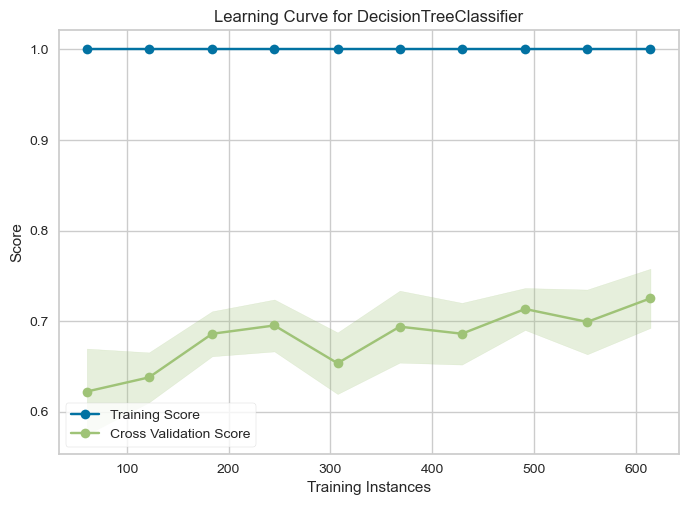

In [59]:
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

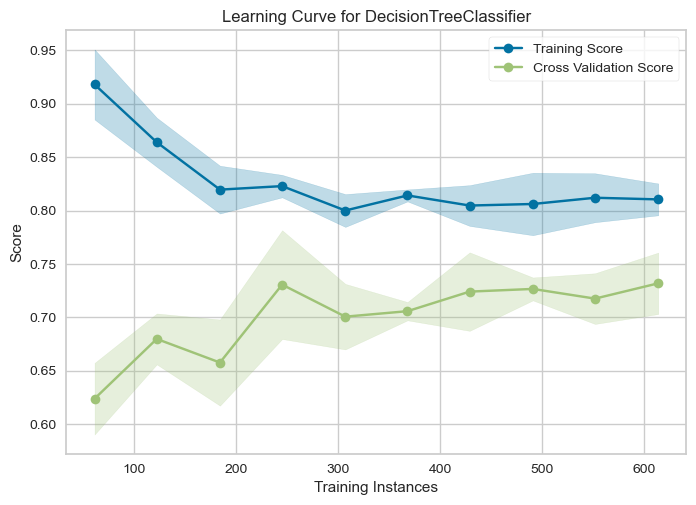

In [60]:
model = DecisionTreeClassifier(max_depth=4, random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
visualizer = LearningCurve(
    model, train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

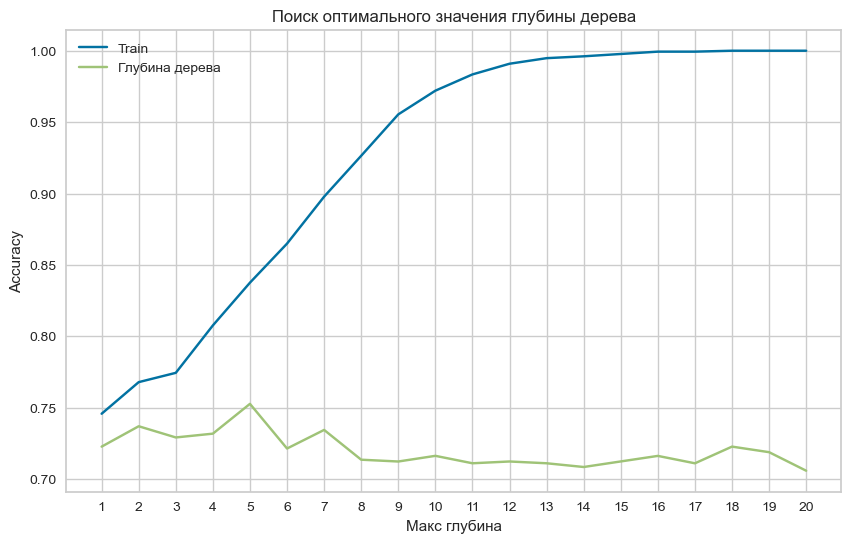

Оптимальная глубина: 5


In [61]:
depth_range = np.arange(1, 21)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=depth_range,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Поиск оптимального значения глубины дерева")
plt.xlabel("Макс глубина")
plt.ylabel("Accuracy")
plt.xticks(depth_range)
plt.plot(depth_range, train_scores_mean, label="Train")
plt.plot(depth_range, test_scores_mean, label="Глубина дерева")
plt.legend(loc="best")
plt.show()

optimal_depth = depth_range[np.argmax(test_scores_mean)]
print("Оптимальная глубина:", optimal_depth)

In [62]:
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.7980
Test score = 0.6948


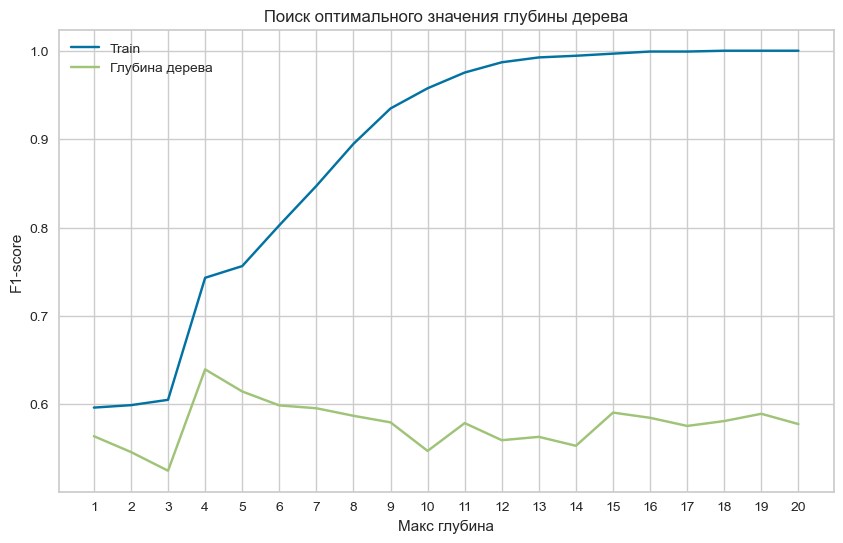

Оптимальная глубина: 4
Train F1-score = 0.7304
Test F1-score = 0.6179


In [63]:
from sklearn.metrics import f1_score

depth_range = np.arange(1, 21)

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=depth_range,
    scoring="f1", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Поиск оптимального значения глубины дерева")
plt.xlabel("Макс глубина")
plt.ylabel("F1-score")
plt.xticks(depth_range)
plt.plot(depth_range, train_scores_mean, label="Train")
plt.plot(depth_range, test_scores_mean, label="Глубина дерева")
plt.legend(loc="best")
plt.show()

optimal_depth = depth_range[np.argmax(test_scores_mean)]
print("Оптимальная глубина:", optimal_depth)

model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train F1-score = %.4f" % f1_score(y_train, y_train_pred))
print("Test F1-score = %.4f" % f1_score(y_test, y_pred))


# 6. Повторите анализ на других реальных датасетах из репозитория OpenML: nursery

In [340]:
from sklearn.datasets import fetch_openml
nursery = fetch_openml(name = "nursery", version=4)
X = nursery.data
y = nursery.target
attribute_names = nursery.feature_names
print(nursery.DESCR)
X

Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.

Downloaded from openml.org.


,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [341]:
y

0         recommend
1          priority
2         not_recom
3         recommend
4          priority
            ...    
12955    spec_prior
12956     not_recom
12957    spec_prior
12958    spec_prior
12959     not_recom
Name: class, Length: 12960, dtype: category
Categories (5, object): ['not_recom', 'priority', 'recommend', 'spec_prior', 'very_recom']

In [342]:
!pip install openml 

In [343]:
# from sklearn.preprocessing import LabelEncoder

# X_encoded = pd.get_dummies(X)

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

<b> Регуляризация - Метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

## Диагностика модели классификации

In [344]:
for column in Xn.columns:
    X[column], _ = X[column].factorize()
X

,parents,has_nurs,form,children,housing,finance,social,health
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
12955,2,4,3,3,2,1,1,1
12956,2,4,3,3,2,1,1,2
12957,2,4,3,3,2,1,2,0
12958,2,4,3,3,2,1,2,1


In [345]:
y, _ = y.factorize()
y

array([0, 1, 2, ..., 4, 4, 2], dtype=int64)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [347]:
md = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {md.score(X_train, y_train):.4f}")
print(f"Test score: {md.score(X_test, y_test):.4f}")

Training score: 0.9059
Test score: 0.9164


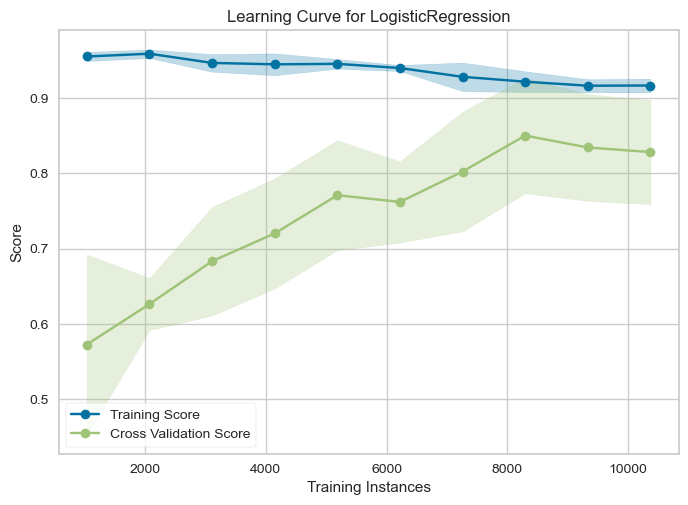

In [348]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [349]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.5564
Test score: 0.5685


212.09508879201903


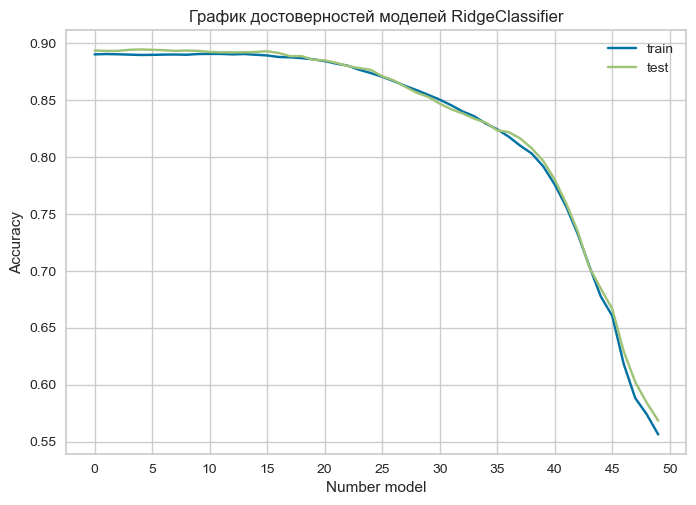

In [350]:
trains = []
tests = []
L2 = []
for l2 in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=l2).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))
  L2.append(l2)

for i in np.logspace(2, 6, 50):
    if max(tests) == RidgeClassifier(alpha=i).fit(X_train, y_train).score(X_test, y_test):
        print(i)

plt.plot(trains, label="train")
plt.plot(tests, label="test")

plt.title('График достоверностей моделей RidgeClassifier')
plt.ylabel('Accuracy')
plt.xlabel('Number model')
plt.xticks(np.arange(0, 51, 5))
plt.legend()
plt.show()

In [351]:
lr = RidgeClassifier(alpha=212.09508879201903).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8896
Test score: 0.8944


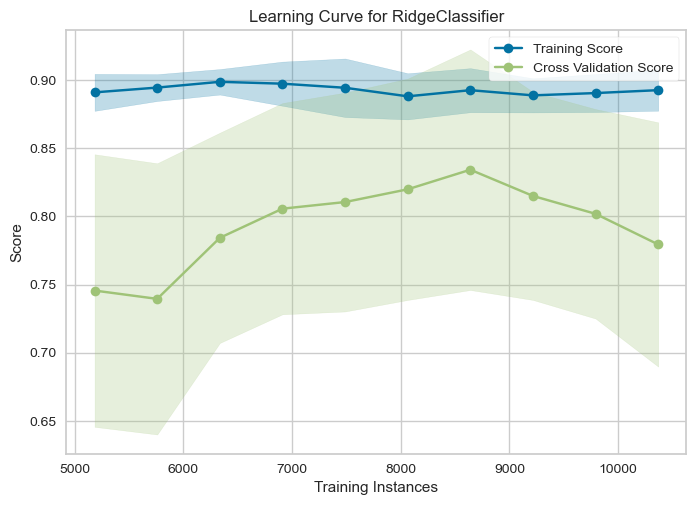

In [352]:
visualizer = LearningCurve(
    lr, train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()